In [1]:
!pip install underthesea

In [2]:
import pandas as pd
import re
from collections import Counter
from underthesea import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.matutils import corpus2dense
from pprint import pprint
from collections import Counter, defaultdict
from gensim.models import TfidfModel
import unicodedata
import emoji
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('/kaggle/input/product-raw/Products_ThoiTrangNam_raw.csv')

In [5]:
df.head()

,product_id,product_name,category,sub_category,link,image,price,rating,description
0,190,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
1,191,"Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...,https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...,26800.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nXu...
2,192,"Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không...",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...,https://cf.shopee.vn/file/6f93bcda10efe374f8cc...,39500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nTh...
3,193,ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...,https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...,16500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
4,194,Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (B...,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...,NaN,45000.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49663 entries, 0 to 49662
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    49663 non-null  int64  
 1   product_name  49663 non-null  object 
 2   category      49663 non-null  object 
 3   sub_category  49663 non-null  object 
 4   link          49663 non-null  object 
 5   image         36443 non-null  object 
 6   price         49663 non-null  float64
 7   rating        49663 non-null  float64
 8   description   48700 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [7]:
df = df.dropna(subset=['description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48700 entries, 0 to 49662
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    48700 non-null  int64  
 1   product_name  48700 non-null  object 
 2   category      48700 non-null  object 
 3   sub_category  48700 non-null  object 
 4   link          48700 non-null  object 
 5   image         35542 non-null  object 
 6   price         48700 non-null  float64
 7   rating        48700 non-null  float64
 8   description   48700 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.7+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
# Hiển thị toàn bộ nội dung cột mà không bị cắt bớt
pd.set_option('display.max_colwidth', None)

In [10]:
product_info = df[df['product_id'] == 200][['product_id', 'product_name', 'description']]
product_info

,product_id,product_name,description
1500,200,[Có VIDEO + ẢNH THẬT] Áo sweater - Áo nỉ bông tay dài UNISEX NE346,"Danh Mục\nShopee\nThời Trang Nam\nÁo Hoodie, Áo Len & Áo Nỉ\nÁo Nỉ\nXuất xứ\nViệt Nam\nMùa\nMùa đông\nChất liệu\nKhác\nChiều dài tay áo\nDài tay\nKho hàng\n46151\nGửi từ\nTP. Hồ Chí Minh\n\n♥️ ÁO SWEATER - NỈ BÔNG TAY DÀI UNISEX♥️\n\n🌟THÔNG TIN SẢN PHẨM:\n ❣️ Form áo suông unisex, nam - nữ mặc đều được.\n ❣️ Chất liệu áo: nỉ lót bông dày dặn\n ❣️ Hình in nổi chất lượng dạng decal hoặc đắp vải nên không sợ xuống màu hoặc bể, nứt sau vài lần giặt.\n ❣️Có 5 size M, L, XL, XXL, XXXL\n 💥Shop có up kèm bảng size kích thước các bạn xem rồi so sánh với áo sweater đang mặc nhé. Nếu đo áo thun mà so với bảng size thì tăng lên 1 size so với áo thun nhé (chất liệu là nỉ bông hơi dày với độ co giãn không bằng thun nên up 1 size so với áo thun nha bạn ^^ )\n 💥Còn nếu muốn chính xác bạn vui lòng inbox cân nặng - chiều cao để shop tư vấn size nhé ^^. \n ❣️ Xuất xứ: Việt Nam\n ❣️ Tên đơn vị sản xuất: HKD Tiểu Dung\n ❣️ Địa chỉ sản xuất: 162/6 Tôn Thất Hiệp, P13, Q11, TPHCM\n--------------------------\n🌟 SHOP CAM KẾT:\n ❣️ THẬT: Áo thật như trong ảnh, video (shop tự quay, tự chụp)\n ❣️ GIẶT: giặt máy thoải mái, không sợ bong tróc hình in.\n ❣️ FULL Size từ 40-80kg\n ❣️ ĐƯỢC hỗ trợ đổi size nếu mặc không vừa, rộng, chật.\n ❣️ Shop chịu hoàn toàn phí đổi trả nếu gửi sai \n---------------------------------------------------\n🏠 XƯỞNG ÁO THUN MALL \n ❣️ Shop chuyên sỉ và lẻ áo Unisex.\n ❣️ Cập nhật mẫu mã mới nhất theo xu hướng thời trang giới trẻ hiện nay. \n ❣️ Luôn đảm bảo chất lượng sản phẩm và dịch vụ chăm sóc khách hàng. \n ❣️ Giá cả hợp lí nhất.\n\n#aokhoac #aoni #aosweater #hoodie #aokhoacdep #aosweaterdep #aonidep #aounisex #hoodieni #aohoodieni #hoodieningoai #hoodieunisex #sweater"


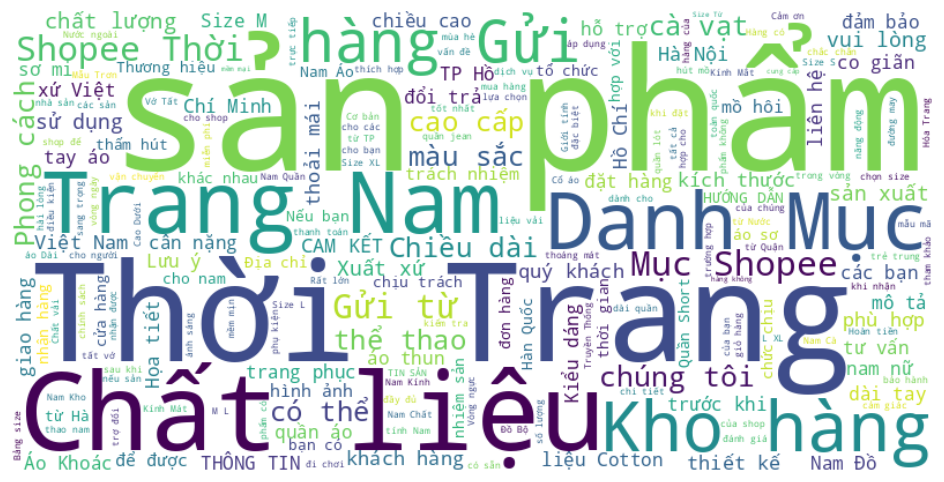

In [11]:
text = " ".join(df['description'].astype(str)) + " " + " ".join(df['product_name'].astype(str))

# Tạo word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df['ori'] = df['description']

In [13]:
# Hàm phụ: Tính số ký tự bị loại bỏ sau mỗi bước
def char_diff(df, before, after, name):
    df[name] = df[before].str.len() - df[after].str.len()

In [14]:
# Hàm phụ: Hiển thị kết quả sau mỗi bước
def show(df, cols, title):
    print(f'\n📊 {title}\n')
    display(df[cols].head(3))

In [15]:
def normalize(text):
    return unicodedata.normalize('NFC', text).lower()

df['s1'] = df['ori'].apply(normalize)

In [16]:
# Hàm bỏ ký tự đặc biệt decor line
def clean_special_chars(text):
    return re.sub(r'[-–—=*#]{3,}', '', text)
    
# Hàm loại bỏ emoji bằng thư viện emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Hàm loại bỏ hashtag
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Hàm loại bỏ link
def remove_links(text):
    return re.sub(r'http\S+|www\.\S+', '', text)

# Hàm loại bỏ số điện thoại (Việt Nam)
def remove_phone_numbers(text):
    return re.sub(r'\b0\d{9,10}\b|\b0\d{1,3}\.\d{3}\.\d{3}\b', '', text)

# Hàm bỏ size
def remove_size_info(text):
    # List pattern mở rộng, clean bảng size + thông tin kích thước
    size_patterns = [
        r'(size|kích thước|ngang áo|vòng ngực)[^\n]{0,50}(\d+\s*(kg|cm))',
        r'\b(m|l|xl|xxl|2xl|3xl|4xl)\b[^\n]{0,50}(\d+\s*(kg|cm))',
        r'\d{2,3}\s*-\s*\d{2,3}\s*(kg|cm)',
        r'\b\d+\s*(kg|cm)\b',
        r'\bsize\b\s*[:\-]?\s*[a-z0-9\/ ]+',
    ]
    
    # Kết hợp tất cả pattern thành 1 regex
    combined_pattern = '|'.join(size_patterns)
    
    # Thực hiện thay thế các pattern bằng khoảng trắng
    return re.sub(combined_pattern, '', text, flags=re.IGNORECASE)

# Gộp tất cả thành 1 function step 2
def clean_step2(text):
    text = clean_special_chars(text)
    text = remove_emoji(text)
    text = remove_hashtags(text)
    text = remove_links(text)
    text = remove_phone_numbers(text)
    text = remove_size_info(text)
    return text

# Áp dụng bước 2
df['s2'] = df['s1'].apply(clean_step2)
char_diff(df, 's1', 's2', 'diff2')
show(df, ['s1', 's2', 'diff2'], 'Bước 2 - Clean pattern-based')



📊 Bước 2 - Clean pattern-based



,s1,s2,diff2
0,"danh mục\nshopee\nthời trang nam\náo ba lỗ\nchiều dài tay áo\nkhác\nphong cách\nthể thao, cơ bản, đường phố, nhiệt đới\ntall fit\ncó\nxuất xứ\nviệt nam\ndáng kiểu áo\nôm sát\nchất liệu\ncotton\nmẫu\nsọc tăm có gân nổi\nkho hàng\n75317\ngửi từ\nbà rịa - vũng tàu\n\nbest tank tops for men 2021\n\náo ba lỗ quốc dân cho nam \n—————————————————\nbảng size :\nsize m : 45kg-50kg\nsize l : 55kg -60kg \nsize xl : 65kg- 70kg\nsize xxl : 75kg - 80kg \n\n(bảng size này là chuẩn mặc kiểu body nha quý khách còn nếu khách nào không thích mặc ôm thì tăng lên 1 size nhé còn muốn mặc rộng rộng thì tăng lên 2 size \nbảng size chỉ mang tính chất tham khảo vì có nhiều khách thể hình không được cân đối .để được tư vấn chính xác vui lòng inbox cho shop nhé)\n\nkích thước :\nsize m: dài 66cm rộng :39cm (vòng ngực 78cm)\nsize l: dài 68cm. rộng : 43cm (vòng ngực 86cm)\nsize xl:dài 70cm rộng : 47cm (vòng ngực 94cm)\nsize 2xl: dài 72cm rộng : 51cm (vòng ngực 102cm)\n\nvòng nách : \nm : dài 25cm\nl : dài 27cm\nxl: dài 29cm\nxxl : dài 31cm\n\nbảng size trên là mặc vừa cơ thể (không quá ôm sát cũng không bị rộng quá vừa vừa người) tuỳ vào sở thích mỗi người nếu bạn có body chuẩn 6 múi muốn mặc ôm sát thì hạ xuống 1 size , nếu muốn mặc rộng rãi thoải mái thì tăng thêm 1 size nhé!\nbảng size chỉ mang tính chất tham khảo nó chỉ tương đối chứ không chính xác tuyệt đối nha khách vì phụ thuộc vào cơ địa mỗi người khác nhau . mọi trường hợp thắc mắc về size sản phẩm , quý khách vui lòng nhắn tin cho shop để được tư vấn chính xác nhất! \n\náo ba lỗ thun gân ,một mẫu áo basic thiết yếu và tiện lợi, hầu như được tất cả phái mạnh trên toàn thế giới đều rất ưa chuộng , cực kỳ yêu thích và tất nhiên các chàng trai việt nam của chúng ta cũng không ngoại lệ !\n\nngoài những ưu điểm chính như: trẻ trung năng động , không lỗi thời , đơn giản dễ mặc , chất vải thun cotton thấm hút tốt , độ co giãn đàn hồi cao những sợi gân vải nổi giúp tăng thêm sự cá tính và khỏe khoán cho người mặc … thì điểm nhấn đó chính là form áo cực đẹp tôn vinh lên vóc dáng ,giúp những chàng trai trở nên tự tin hơn cuốn hút hơn! \n\ncó thể mix với áo khoác , áo vét …mặc ở nhà , đi chơi , đi gym, du lịch ..\n\nchất vải shop xin cam kết giống như hình ảnh shop đăng bán , vải đẹp và đanh , cứng fom, không nhão , không chảy , không bèo nhèo …\nkhi nhận hàng nếu sản phẩm không giống mô tả quý khách được quyền bấm trả hàng hoàn tiền !","danh mục\nshopee\nthời trang nam\náo ba lỗ\nchiều dài tay áo\nkhác\nphong cách\nthể thao, cơ bản, đường phố, nhiệt đới\ntall fit\ncó\nxuất xứ\nviệt nam\ndáng kiểu áo\nôm sát\nchất liệu\ncotton\nmẫu\nsọc tăm có gân nổi\nkho hàng\n75317\ngửi từ\nbà rịa - vũng tàu\n\nbest tank tops for men 2021\n\náo ba lỗ quốc dân cho nam \n\nbảng : -\n \n\n \n\n(bảng ày là chuẩn mặc kiểu body nha quý khách còn nếu khách nào không thích mặc ôm thì tăng lên 1 é còn muốn mặc rộng rộng thì tăng lên 2 ảng ỉ mang tính chất tham khảo vì có nhiều khách thể hình không được cân đối .để được tư vấn chính xác vui lòng inbox cho shop nhé)\n\nkích thước :\n)\n)\n)\n)\n\nvòng nách : \n\n\n\n\n\nbảng ên là mặc vừa cơ thể (không quá ôm sát cũng không bị rộng quá vừa vừa người) tuỳ vào sở thích mỗi người nếu bạn có body chuẩn 6 múi muốn mặc ôm sát thì hạ xuống 1 , nếu muốn mặc rộng rãi thoải mái thì tăng thêm 1 é!\nbảng ỉ mang tính chất tham khảo nó chỉ tương đối chứ không chính xác tuyệt đối nha khách vì phụ thuộc vào cơ địa mỗi người khác nhau . mọi trường hợp thắc mắc về ản phẩm , quý khách vui lòng nhắn tin cho shop để được tư vấn chính xác nhất! \n\náo ba lỗ thun gân ,một mẫu áo basic thiết yếu và tiện lợi, hầu như được tất cả phái mạnh trên toàn thế giới đều rất ưa chuộng , cực kỳ yêu thích và tất nhiên các chàng trai việt nam của chúng ta cũng không ngoại lệ !\n\nngoài những ưu điểm chính như: trẻ trung năng động , không lỗi thời , đơn giản dễ mặc , chất vải thun cotton thấm hút tốt , độ co giãn đàn hồi cao những sợi gân vải nổi giúp tăng thêm sự cá tính và khỏe khoán cho người mặc … th

In [17]:
def split_sentences(text):
    return re.split(r'[\.。,;\n\r\t,]+', text)

def analyze_frequent_sentences(df, text_column, min_length=5, max_length=200, top_n=100):
    """
    Phân tích tần suất xuất hiện của các câu / cụm từ trong mô tả sản phẩm.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu gốc.
        text_column (str): Tên cột chứa text cần phân tích.
        min_length (int): Độ dài tối thiểu của câu để giữ lại.
        max_length (int): Độ dài tối đa của câu để giữ lại.
        top_n (int): Số lượng câu phổ biến nhất để hiển thị.

    Returns:
        dict: Dictionary chứa câu và tần suất.
    """
    def split_sentences(text):
        return re.split(r'[\.。,;\n\r\t,]+', text)

    # Gom toàn bộ câu vào list
    all_lines = []
    for desc in df[text_column]:
        lines = split_sentences(desc)
        lines = [line.strip() for line in lines if min_length < len(line.strip()) < max_length]
        all_lines.extend(lines)

    # Đếm tần suất
    line_freq = Counter(all_lines)

    # In theo format yêu cầu
    print(f'\n📊 Top {top_n} câu / cụm từ phổ biến nhất:\n')
    for line, count in line_freq.most_common(top_n):
        print(f'"{line}" → {count}')

    return line_freq


In [18]:
analyze_frequent_sentences(df, text_column='s2', top_n=100)


📊 Top 100 câu / cụm từ phổ biến nhất:

"shopee" → 46720
"thời trang nam" → 46693
"danh mục" → 46682
"kho hàng" → 46371
"gửi từ" → 46075
"chất liệu" → 20785
"xuất xứ" → 18271
"hà nội" → 17838
"hồ chí minh" → 12629
"việt nam" → 12383
"nước ngoài" → 9171
"phong cách" → 8607
"giới tính" → 8318
"cotton" → 8140
"rất lớn" → 7162
"chiều dài tay áo" → 5897
"tên tổ chức chịu trách nhiệm sản xuất" → 4967
"địa chỉ tổ chức chịu trách nhiệm sản xuất" → 4883
"trang phục truyền thống" → 4863
"cơ bản" → 4833
"vớ/tất" → 4797
"họa tiết" → 4781
"đồ hóa trang" → 4661
"indonesia" → 4634
"thể thao" → 4413
"cà vạt & nơ cổ" → 4362
"thương hiệu" → 4268
"kính mắt nam" → 3940
"trung quốc" → 3721
"tall fit" → 3572
"hàn quốc" → 3292
"kiểu dáng quần" → 3208
"kính mát" → 2959
"đường phố" → 2580
"kiểu đóng gói" → 2446
"lưu ý:" → 2383
"chiều dài vớ" → 2348
"thời gian giao hàng dự kiến cho sản phẩm này là từ 7-9 ngày" → 2285
"chiều dài quần" → 2237
"áo khoác" → 2193
"thoáng mát" → 2137
"loại tất/vớ" → 2075
"quần short"

Counter({'danh mục': 46682,
         'shopee': 46720,
         'thời trang nam': 46693,
         'áo ba lỗ': 1544,
         'chiều dài tay áo': 5897,
         'phong cách': 8607,
         'thể thao': 4413,
         'cơ bản': 4833,
         'đường phố': 2580,
         'nhiệt đới': 1134,
         'tall fit': 3572,
         'xuất xứ': 18271,
         'việt nam': 12383,
         'dáng kiểu áo': 1421,
         'ôm sát': 71,
         'chất liệu': 20785,
         'cotton': 8140,
         'sọc tăm có gân nổi': 1,
         'kho hàng': 46371,
         'gửi từ': 46075,
         'bà rịa - vũng tàu': 83,
         'best tank tops for men  2021': 1,
         'áo ba lỗ quốc dân cho nam': 1,
         'bảng : -': 2,
         'để được tư vấn chính xác vui lòng inbox cho shop nhé)': 1,
         'kích thước :': 11,
         'vòng nách :': 1,
         'bảng ên là mặc vừa cơ thể (không quá ôm sát cũng không bị rộng quá vừa vừa người) tuỳ vào sở thích mỗi người nếu bạn có body chuẩn 6 múi muốn mặc ôm sát thì 

In [19]:
# blacklist thủ công
blacklist = set([
    'shopee', 'danh mục', 'kho hàng', 'gửi từ',
    'tên tổ chức chịu trách nhiệm sản xuất', 'địa chỉ tổ chức chịu trách nhiệm sản xuất',
    'kiểu đóng gói', 'lưu ý:',
    'thời gian giao hàng dự kiến cho sản phẩm này là từ 7-9 ngày',
    'thông tin sản phẩm', 'thông tin sản phẩm:', 'đang cập nhật',
    'hoàn tiền nếu sản phẩm không giống với mô tả',
    'giao hàng ngay khi nhận được đơn', 'hàng có sẵn',
    'trường hợp không đủ điều kiện áp dụng chính sách:',
    '- gửi lại hàng không đúng mẫu mã',
    'do màn hình và điều kiện ánh sáng khác nhau',
    'nhầm màu', 'thời trang nam', 'không hợp', 'chưa qua sử dụng',
    'mô tả sản phẩm', 'bảo hành', 'sản phẩm', 'đơn hàng',
    'giao hàng', 'đổi trả', 'miễn phí', 'khi nhận hàng',
    'giá sản phẩm', 'ưu đãi', 'chính sách', 'hỗ trợ',
    'khách hàng', 'liên hệ', 'vui lòng', 'lỗi kỹ thuật',
    'phản hồi', 'cam kết', 'thông báo', 'quý khách',
    'được kiểm tra hàng', 'shop', 'đóng gói', 'chất lượng',
    'mới 100%', 'chúc bạn', 'cảm ơn', 'bảo đảm', 'xem thêm',
    'click vào', 'hình ảnh chỉ mang tính chất minh họa',
    'bảo vệ người tiêu dùng', 'đã được kiểm tra kỹ lưỡng',
    'chưa bóc tem', 'hoặc inbox shop', 'nhắn tin để được tư vấn',
    'theo dõi shop'
])

In [20]:
# Regex pattern để lọc các câu chứa các từ không cần thiết
pattern = re.compile(r'\b(cam kết|hoàn tiền|bảo hành|đổi trả|cảm ơn|hướng dẫn|liên hệ|giao hàng|tư vấn|tham khảo|inbox/ghi chú)\b', re.IGNORECASE)

In [21]:
# Bước 3: Clean mô tả khỏi blacklist và regex
df['s3'] = df['s2'].apply(lambda x: ' '.join([
    line.strip() for line in split_sentences(x)
    if line.strip().lower() not in blacklist and not pattern.search(line)
]))

In [22]:
df['product_clean'] = df['product_name'].str.lower().str.strip()
df['s3_combined'] = df['product_clean'] + ' ' + df['s3']

In [23]:
# === Bước 4: Xoá ký tự đặc biệt (nhưng giữ tiếng Việt) ===
def remove_special_characters_vietnamese(text):
    pattern = r'[^\sa-zA-Z0-9ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềềểếệỉịọỏốồổỗộớờởỡợụủứừửữựỳýỵỷỹđÀÁẠẢÃÂẦẤẬẨẪĂẰẮẶẲẴÈÉẸẺẼÊỀẾỆỂỄÌÍỊỈĨÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠÙÚỤỦŨƯỪỨỰỬỮỲÝỴỶỸĐ]'
    return re.sub(pattern, '', text)

df['s4'] = df['s3_combined'].apply(remove_special_characters_vietnamese)

In [24]:
# === Bước 5: Lọc từ tiếng Việt hợp lệ (bỏ từ lỗi hoặc noise) ===
def filter_vietnamese_words(text):
    vietnamese_chars = (
        "a-zA-Z0-9_"
        "àáạảãâầấậẩẫăằắặẳẵ"
        "èéẹẻẽêềếệểễ"
        "ìíịỉĩ"
        "òóọỏõôồốộổỗơờớợởỡ"
        "ùúụủũưừứựửữ"
        "ỳýỵỷỹ"
        "đ"
        "ÀÁẠẢÃÂẦẤẬẨẪĂẰẮẶẲẴ"
        "ÈÉẸẺẼÊỀẾỆỂỄ"
        "ÌÍỊỈĨ"
        "ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠ"
        "ÙÚỤỦŨƯỪỨỰỬỮ"
        "ỲÝỴỶỸ"
        "Đ"
    )
    valid_pattern = f'^[{vietnamese_chars}]+$'
    return ' '.join([w for w in text.split() if re.match(valid_pattern, w)])

df['s5'] = df['s4'].apply(filter_vietnamese_words)

In [26]:
# === Bước 6: Tokenize + loại bỏ stopwords ===

# Load stopwords
with open('/kaggle/input/stopword/vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = set(line.strip() for line in f if line.strip())

# Custom stopwords bổ sung
custom_stopwords = [
    'shop', 'mẫu', 'hình', 'hợp', 'tôi', 'chúng tôi', 'khách hàng',
    'đơn', 'mua', 'khi', 'hàng', 'các', 'và', 'với', 'cho', 'được',
    'rất', 'còn', 'này', 'ở', 'đã', 'nhưng', 'một', 'như', 'kiểu', 'dạng',
    'mỗi', 'nào', 'bạn', 'lỗi', 'giao', 'gửi', 'chụp', 'kèm', 'giúp', 'free',
    'cm', 'đổi', 'please', 'tp', 'giữ', 'thích', 'store', 'không', 'là',
    'giá', 'đồng', 'xưởng', 'tăng', 'giảm', 'rẻ', 'đắt', 'hcm', 'đẹp', 
    'đồ', 'bán', 'cực', 'siêu', 'tùy', 'loại', 'size', 'set', 
    'hotline', 'đủ', 'ship', 'full', 'trọn', 'combo', 
    'inbox', 'chat', 'zalo', 'shopee', 'đường', 'tư', 'vấn', 'tiền', 
    'khách', 'nhé', 'sản', 'phẩm', 'sản phẩm'
]
all_stopwords = stopwords.union(custom_stopwords)

# Tokenize và lọc
def clean_tokens(text):
    tokens = word_tokenize(text, format='plain')
    filtered = [
        word for word in tokens
        if word not in all_stopwords and len(word) > 1 and word.isalpha()
    ]
    return filtered

df['final_cleaned_tokens'] = df['s5'].apply(clean_tokens)

In [27]:
# Lựa chọn các cột cần thiết
columns_to_keep = [
    'product_id',
    'product_name',
    'category',
    'sub_category',
    'price',
    'link',
    'image',
    'rating', 
    'final_cleaned_tokens'
]

df_slim = df[columns_to_keep]

# Lưu lại file mới
df_slim.to_csv('/kaggle/working/cleaned_products_9.csv', index=False)

In [28]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from gensim.models import TfidfModel, LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.similarities import SparseMatrixSimilarity
from gensim import corpora, models, similarities
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud

In [29]:
df2 = pd.read_csv('/kaggle/working/cleaned_products_9.csv')
df2.head()

,product_id,product_name,category,sub_category,price,link,image,rating,final_cleaned_tokens
0,190,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,86250.0,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g%C3%A2n-form-body-t%C3%B4n-d%C3%A1ng-i.83496725.6939920023?sp_atk=887ef2fb-5f8a-43ac-99b7-3267848ec9fc,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdfaa1d5d327f95_tn,4.9,"['áo', 'lỗ', 'thun', 'gân', 'form', 'body', 'áo', 'lỗ', 'chiều', 'tall', 'fit', 'áo', 'ôm', 'sát', 'gân', 'nổi', 'rịa', 'vũng', 'tàu', 'best', 'tank', 'tops', 'for', 'men', 'áo', 'lỗ', 'nam', 'vòng', 'nách', 'bảng', 'ên', 'mặc', 'ôm', 'sát', 'rộng', 'body', 'chuẩn', 'múi', 'mặc', 'ôm', 'sát', 'hạ', 'mặc', 'áo', 'lỗ', 'thun', 'gân', 'phái', 'toàn', 'chàng', 'trai', 'trẻ', 'mặc', 'chất', 'vải', 'thun', 'cotton', 'đàn', 'hồi', 'sợi', 'gân', 'vải', 'nổi', 'mặc', 'nhấn', 'form', 'áo', 'chàng', 'trai', 'mix', 'áo', 'vét', 'mặc', 'gym', 'vải', 'đanh', 'nhão', 'chảy', 'bèo', 'nhèo']"
1,191,"Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp",Thời Trang Nam,Áo Ba Lỗ,26800.0,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr%E1%BA%AFng-Ch%E1%BA%A5t-Cotton-Si%C3%AAu-M%C3%A1t-Si%C3%AAu-%C4%90%E1%BA%B9p-i.170393318.2662407578?sp_atk=1c63002b-43ec-41f4-b681-b6d1b8cc6d5f,https://cf.shopee.vn/file/c7ea4c6574dc79be6b266b9d69b49abc_tn,4.9,"['áo', 'lỗ', 'nam', 'trắng', 'áo', 'lỗ', 'hà', 'đông', 'cotton', 'vải', 'đem', 'mổ', 'hôi', 'tốt', 'mặc', 'thỏa', 'mái', 'tốt', 'vết', 'lằn', 'da', 'mặc', 'áo', 'mặc', 'hại', 'sức', 'khỏe']"
2,192,"Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không xù, mềm mịn",Thời Trang Nam,Áo Ba Lỗ,39500.0,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tyasuo-ch%E1%BA%A5t-v%E1%BA%A3i-co-d%C3%A3n-m%C3%A1t-kh%C3%B4ng-x%C3%B9-m%E1%BB%81m-m%E1%BB%8Bn-i.261283690.6633666489?sp_atk=41f99130-acec-49d7-b19c-5be008ac13d8,https://cf.shopee.vn/file/6f93bcda10efe374f8cc002f238532b8_tn,4.8,"['áo', 'lỗ', 'nam', 'tyasuo', 'chất', 'vải', 'mát', 'xù', 'mềm', 'mịn', 'áo', 'lỗ', 'tyasuo', 'chiều', 'tall', 'fit', 'áo', 'rộng', 'thun', 'tc', 'tyasuo', 'long', 'trường', 'hồ', 'hồ', 'update', 'chất', 'vải', 'form', 'áo', 'mặc', 'mát', 'vải', 'nhão', 'xù', 'nhăn', 'thun', 'tc', 'cotton', 'cotton', 'polyester', 'pha', 'chút', 'spandex', 'áo', 'độ', 'ngang', 'áo', 'ảnh', 'form', 'áo', 'chiều', 'xù', 'mát', 'mắt', 'ổn', 'dòng', 'update', 'file', 'ảnh', 'chiều', 'rộng', 'áo', 'đo', 'áo', 'bề', 'ngang', 'áo', 'hóa', 'tyasuo', 'trường', 'trường', 'hồ', 'hantag', 'lỗ', 'nam', 'áobalỗnam']"
3,193,ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON,Thời Trang Nam,Áo Ba Lỗ,16500.0,https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%80NG-VI%E1%BB%86T-NAM-100-COTTON-i.2657897.1983825814?sp_atk=e0d2a0b1-791e-4718-83ed-f87ed34ce0b0,https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a80bb7f7e7003_tn,4.8,"['áo', 'lỗ', 'cotton', 'áo', 'lỗ', 'cotton', 'áo', 'lỗ', 'nam', 'cotton', 'mặc', 'cotton', 'mặt', 'vải', 'mịn', 'tốt', 'khô', 'đem', 'vải', 'mặc', 'giáng', 'áo', 'xl', 'xxl']"
4,194,Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (BL09),Thời Trang Nam,Áo Ba Lỗ,45000.0,https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83-Thao-Ba-L%E1%BB%97-M%E1%BA%ABu-M%E1%BB%9Bi-Si%C3%AAu-%C4%90%E1%BA%B9p-(BL09)-i.68010081.4248638345?sp_atk=7618e589-1f31-4101-8cbe-7b6ef5e9b166,NaN,4.8,"['áo', 'thun', 'nam', 'lỗ', 'áo', 'lỗ', 'chiều', 'thun', 'nam', 'lỗ', 'vải', 'thun', 'lỗ', 'kim', 'slimfit', 'body', 'thoáng', 'mát', 'thấm', 'hút', 'tốt', 'xl', 'xl', 'kg', 'kg', 'ko', 'màu', 'màu', 'ảnh', 'iv', 'men', 'mỗ', 'đông', 'cod']"


In [30]:
df2['final_cleaned_tokens'] = df2['final_cleaned_tokens'].apply(ast.literal_eval)
df2['final_cleaned_tokens'].head()

0                    [áo, lỗ, thun, gân, form, body, áo, lỗ, chiều, tall, fit, áo, ôm, sát, gân, nổi, rịa, vũng, tàu, best, tank, tops, for, men, áo, lỗ, nam, vòng, nách, bảng, ên, mặc, ôm, sát, rộng, body, chuẩn, múi, mặc, ôm, sát, hạ, mặc, áo, lỗ, thun, gân, phái, toàn, chàng, trai, trẻ, mặc, chất, vải, thun, cotton, đàn, hồi, sợi, gân, vải, nổi, mặc, nhấn, form, áo, chàng, trai, mix, áo, vét, mặc, gym, vải, đanh, nhão, chảy, bèo, nhèo]
1                                                                                                                                                                                                                                                                                                                  [áo, lỗ, nam, trắng, áo, lỗ, hà, đông, cotton, vải, đem, mổ, hôi, tốt, mặc, thỏa, mái, tốt, vết, lằn, da, mặc, áo, mặc, hại, sức, khỏe]
2    [áo, lỗ, nam, tyasuo, chất, vải, mát, xù, mềm, mịn, áo, lỗ, tyasuo, chiều, tall, fit, áo, rộng, thun, tc, tya

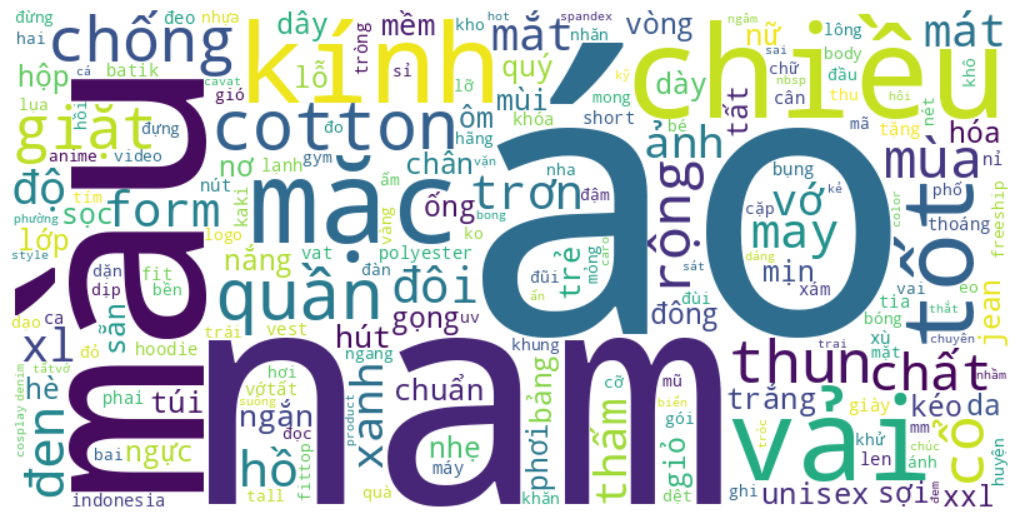

In [31]:
text = ' '.join([' '.join(tokens) for tokens in df2['final_cleaned_tokens']])

# Tạo Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    font_path=None  # Nếu cần hỗ trợ tiếng Việt đẹp hơn
).generate(text)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [32]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [33]:
bigram_phrases = Phrases(df2['final_cleaned_tokens'], min_count=3, threshold=3, delimiter='_')
bigram = Phraser(bigram_phrases)
bigram_tokens = df2['final_cleaned_tokens'].apply(lambda x: bigram[x])

trigram_phrases = Phrases(bigram_tokens, min_count=3, threshold=3, delimiter='_')
trigram = Phraser(trigram_phrases)
df2['trigram_tokens'] = bigram_tokens.apply(lambda x: trigram[x])

In [34]:
from collections import Counter

# Flatten tất cả các tokens sau khi trigram
all_trigrams = [token for doc in df2['trigram_tokens'] for token in doc]
common_phrases = Counter([token for token in all_trigrams if '_' in token])

# In top 20 cụm phổ biến
print(common_phrases.most_common(20))

[('áo_thun', 8374), ('chất_vải', 4354), ('kính_mắt', 3843), ('áo_lỗ', 3306), ('áo_hoodie', 3189), ('màu_đen', 3002), ('nơ_cổ_nam', 2489), ('mùa_hè', 2407), ('chống_nắng', 2093), ('gọng_kính', 1973), ('form_rộng', 1960), ('quần_short', 1788), ('chiều_cân', 1737), ('thoáng_mát', 1566), ('áo_len', 1564), ('thun_lạnh', 1512), ('phai_màu', 1479), ('mềm_mịn', 1433), ('thu_đông', 1400), ('giặt_máy', 1368)]


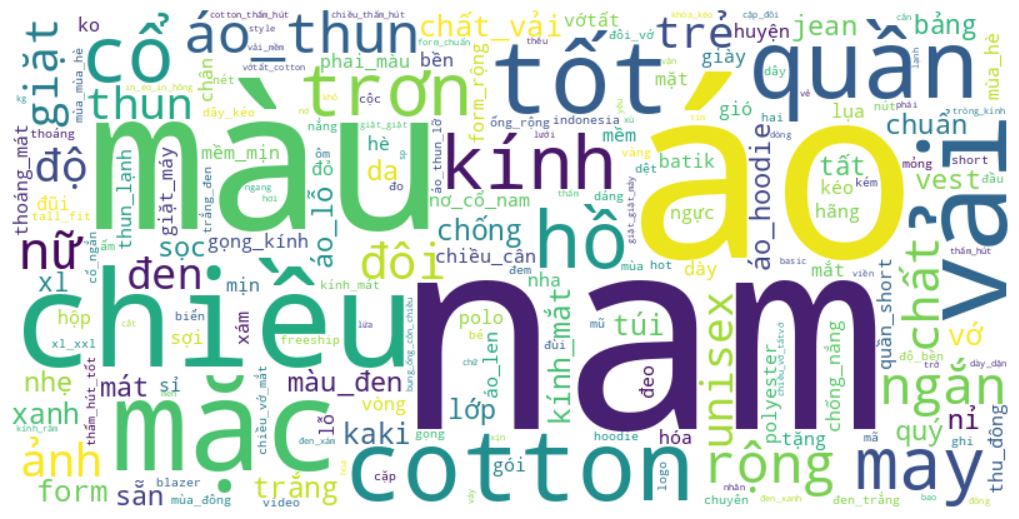

In [36]:
text = ' '.join([' '.join(tokens) for tokens in df2['trigram_tokens']])

# Tạo Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    font_path=None
).generate(text)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
